
First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entr

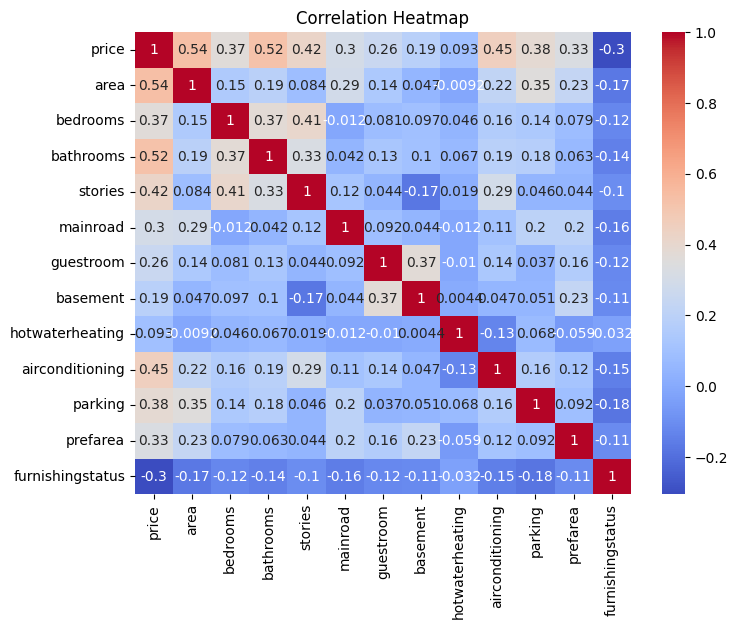

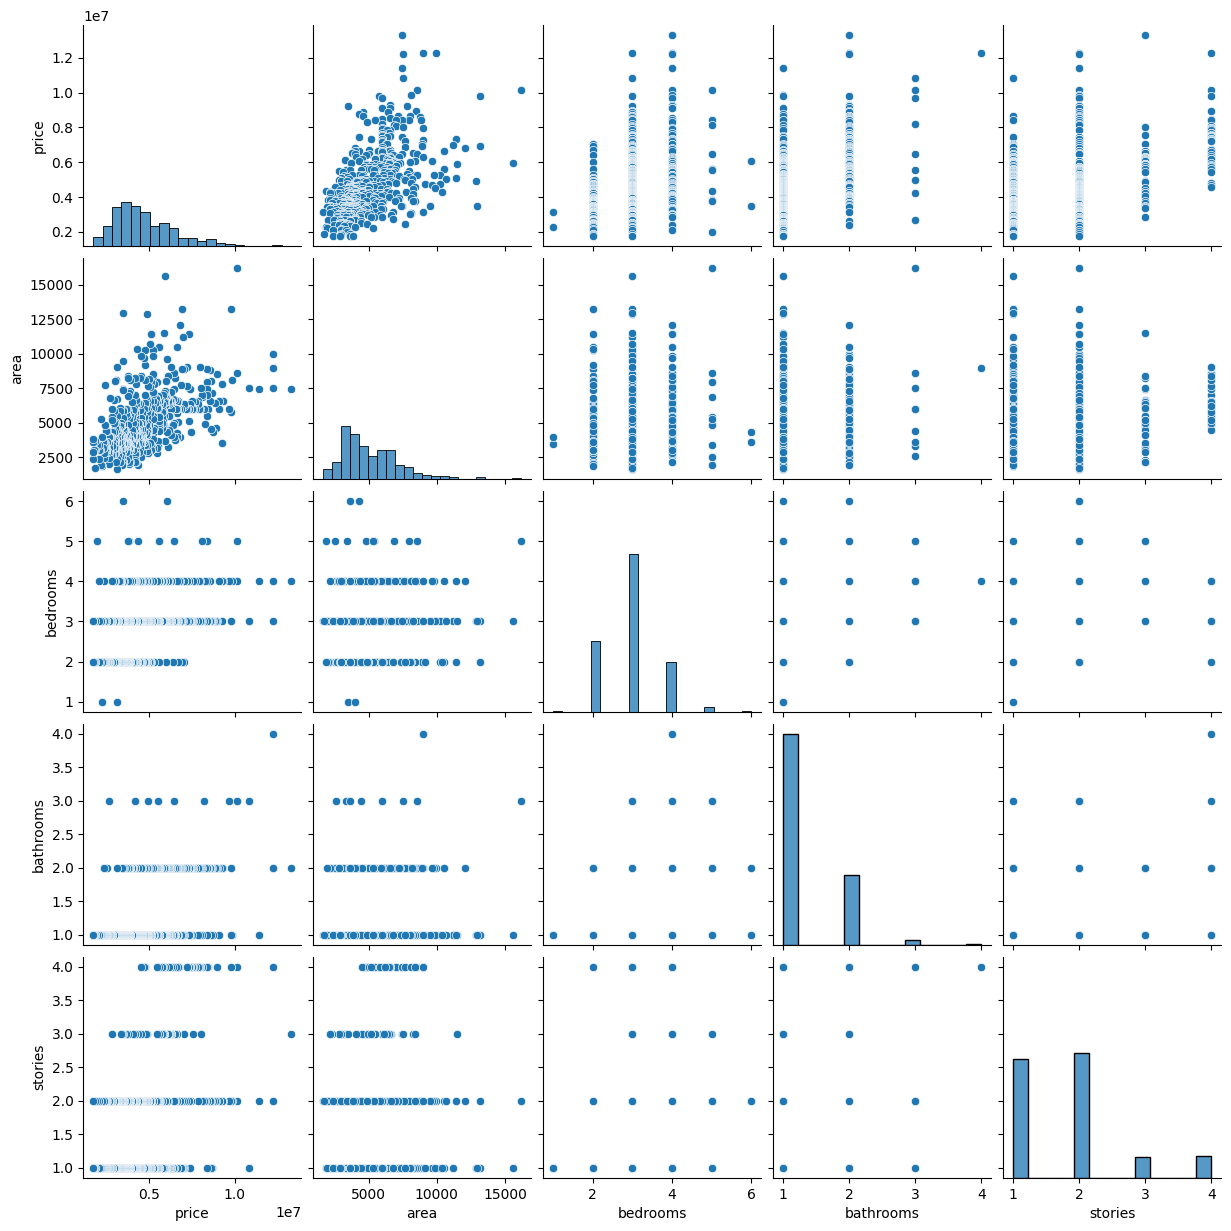


Model Evaluation Metrics:
Mean Absolute Error (MAE): 979679.69
Mean Squared Error (MSE): 1771751116594.03
R-squared (R2): 0.65


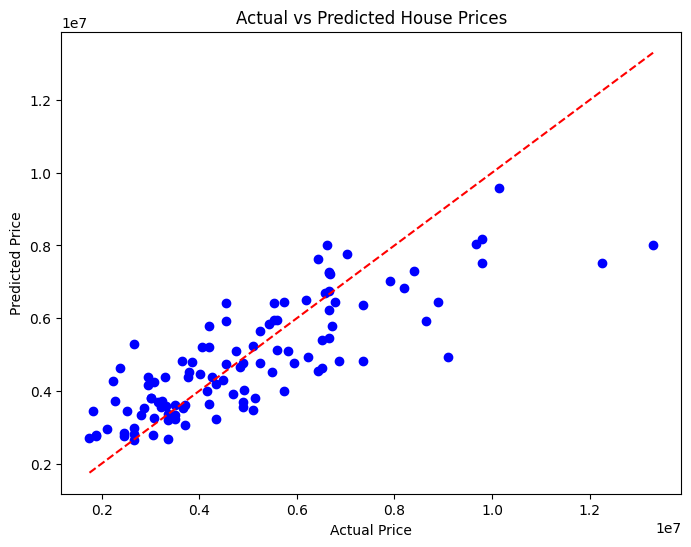


Regression Coefficients:
             Feature   Coefficient
0               area  2.358488e+02
1           bedrooms  7.857449e+04
2          bathrooms  1.097117e+06
3            stories  4.062232e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
6           basement  3.931598e+05
7    hotwaterheating  6.878813e+05
8    airconditioning  7.855506e+05
9            parking  2.257565e+05
10          prefarea  6.299017e+05
11  furnishingstatus -2.103971e+05

Intercept: 293083.07


In [1]:
# Linear Regression Task using housing.csv

# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# =============================
# 2. Load Dataset
# =============================
df = pd.read_csv('Housing.csv')
print("\nFirst 5 rows of dataset:")
print(df.head())

# =============================
# 3. Basic Info
# =============================
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# =============================
# 4. Encode Categorical Features
# =============================
le = LabelEncoder()
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# =============================
# 5. Exploratory Data Analysis
# =============================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (optional visualization)
sns.pairplot(df[['price','area','bedrooms','bathrooms','stories']])
plt.show()

# =============================
# 6. Split Data into Train and Test
# =============================
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 7. Train Linear Regression Model
# =============================
model = LinearRegression()
model.fit(X_train, y_train)

# =============================
# 8. Predict and Evaluate
# =============================
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# =============================
# 9. Visualization: Actual vs Predicted
# =============================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# =============================
# 10. Coefficients Interpretation
# =============================
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coef_df)

print(f"\nIntercept: {model.intercept_:.2f}")